# CREDIT CARD FRAUD DETECTION

### --- Undersampling Approach ---

<p style='text-align: justify;'>Banks and credit card companies want to stop fraud from happening to their customers. As more and more people buy things online, it's important to have a good system in place to catch fraud. That's why they're working on a project to make their fraud detection better. 

The goal of this project is to make a system that can tell when someone is using a credit card fraudulently, so that the real card owner is not charged for something they didn't buy. The system uses regression models to look at the credit card data and figure out if there's something suspicious going on. Regression appraoches are utilized to analyze transaction data, identify patterns, and predict the likelihood of fraudulent activity.

By constantly checking credit card transactions as they happen, the system can quickly tell the bank or credit card company if something seems wrong. This helps protect the customer's money and keeps the whole financial system honest.</p>

### LIBRARIES IMPORTED

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import sklearn.linear_model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm

### DATA INFORMATION

The dataset shows credit card transcations made by European cardholders in September 2013. It comprises of 284,807 entries all in numerical values and 31 columns. Original data features and other background information are not provided because of confidentiality concerns. 
 
**Column Names and Description:**
<br>**Time** - this column includes the number of seconds that have passed between each transaction.
<br>**Amount** - this column includes the amount in the transaction
<br>**V1-V28** - these columns includes all the confidential data transformed with PCA.
<br>**Class** - this is a binary representation of the fraudulent transactions where 1 means fraud and 0 means non-fraud.

The original dataset is already clean and there are no null or missing values.

In [2]:
df = pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Removing duplicates

df.drop_duplicates(inplace = True)
print("\n", '\033[1m' +'1,081 duplicate values were removed.' + '\033[0m')



 1,081 duplicate values were removed.


In [5]:
# Checking the column names and information

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

In [6]:
# Checking the basic statistics of the numerical columns

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [7]:
df["Transaction"] = np.where(df["Class"]== 0, "Valid", "Fraud")

In [8]:
# Categorizing data

valid = df[df.Class == 0]
fraud = df[df.Class == 1]
print("\n", '\033[1m' + 'Statistics of all Non-fraudulent transcations under Amount column:' + '\033[0m')
print("\n", valid["Amount"].describe(),"\n")
print("-------------------------------------------------------------------------------")
print("\n", '\033[1m' + 'Statistics of all Fraudulent transcations under Amount column:' + '\033[0m')
print("\n", fraud["Amount"].describe())


 Statistics of all Non-fraudulent transcations under Amount column:

 count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64 

-------------------------------------------------------------------------------

 Statistics of all Fraudulent transcations under Amount column:

 count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [9]:
# Checking the distribution frequency of class name.
print("\n", '\033[1m' + 'The distinct values for column Class are:' + '\033[0m')
print("\n", df["Class"].unique(),"\n")
print("-------------------------------------------------------------------------------")
print("\n", '\033[1m' + 'The distribution of the frequency for column Class are:' + '\033[0m')
print("\n",df.Class.value_counts())


 The distinct values for column Class are:

 [0 1] 

-------------------------------------------------------------------------------

 The distribution of the frequency for column Class are:

 0    283253
1       473
Name: Class, dtype: int64



 The percentage of the recorded transactions:

 99.8% are valid 
 0.2% are fraudulent

 -----------------------------------------------


Text(0.5, 1.0, 'Data Distribution')

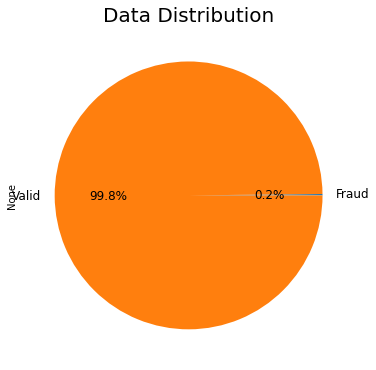

In [10]:
print("\n", '\033[1m' + 'The percentage of the recorded transactions:' + '\033[0m')
print("\n","99.8% are valid", "\n", "0.2% are fraudulent")
print("\n", "-----------------------------------------------")
df.groupby('Transaction').size().plot(kind='pie', autopct='%.1f%%',figsize=(6, 8),textprops={'size': 'large'},wedgeprops={'linewidth': 2.0})
plt.title('Data Distribution', size = 20)

<AxesSubplot:xlabel='Transaction', ylabel='count'>

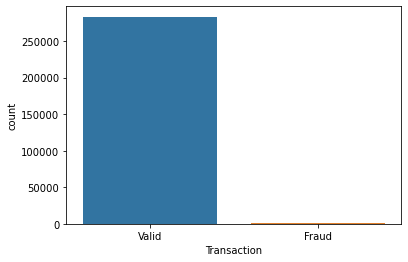

In [11]:
sns.countplot(data=df, x="Transaction")

#### Distribution Check per Column


 Sample Graphs


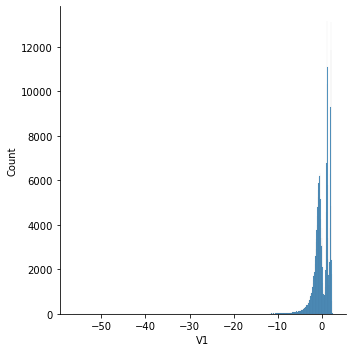

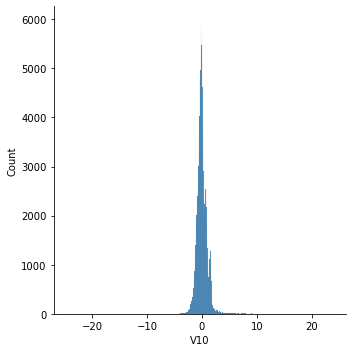

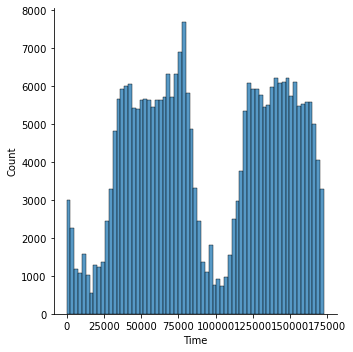

In [12]:
features = list(df.columns)

def displot(feature_1):
    for f in features:
        if f == feature_1:
            sns.displot(df, x=df[f])
    return plt.show()
print("\n", '\033[1m' + 'Sample Graphs' + '\033[0m')
displot("V1")
displot("V10")
displot("Time")

### UNDERSAMPLING APPROACH

Since it is very evident our data distribution is imbalanced, one technique we can use is the Undersampling approach. 

Undersampling is a technique used to balance the class distribution of the dataset into decreasing the size of the dominant class (Valid or Non-Fraudalent). This approach is helpful in balancing the dataset by not creating a bias favoring the majority class. The technique randomly removes instances from the majority class until it reaches the same size as the minority class.

We balanced our dataset by randomly getting 473 samples from the Valid or Non-Fraudulent data to equalize our Fraud data.

In [13]:
# Creating samples for valid dataet

valid_samples = valid.sample(len(fraud))

In [14]:
#Creating a new dataframe

df_new= pd.concat([valid_samples , fraud], axis=0)

In [15]:
df_new.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Transaction
172210,121002.0,2.007302,-0.525047,-2.480850,-0.422592,2.280889,3.595314,-0.629726,0.848890,0.718839,...,0.367625,0.088815,0.767424,0.161005,0.476819,-0.030004,-0.069919,12.95,0,Valid
236993,149049.0,-1.280318,-0.087566,2.494241,-3.280794,-1.373838,-0.134677,-0.675136,0.760674,2.905449,...,0.895910,-0.557862,0.087313,0.977593,-0.714053,0.022462,-0.004062,7.39,0,Valid
41517,40716.0,-0.698996,-0.061182,2.097679,0.114531,-0.225816,0.437442,0.620930,-0.056715,0.408257,...,0.036144,0.072101,-0.432694,-0.120307,0.288097,-0.102376,-0.091187,142.93,0,Valid
23715,32879.0,-0.726208,0.550981,2.875002,2.540939,0.062149,1.021683,-0.511044,0.423209,-0.645433,...,0.671857,-0.338587,-0.532720,0.020799,0.424391,0.183377,-0.071152,8.05,0,Valid
77346,57007.0,1.032000,-0.040059,0.060745,1.010354,-0.186277,-0.428801,0.213690,-0.068602,-0.206484,...,0.093929,-0.234888,0.009944,0.651367,-0.334818,-0.011890,0.023337,103.86,0,Valid


In [16]:
# Checking data if it is equally distributed per Class

df_new['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

In [17]:
# Checking the number of rows and columns our new dataset contains

valid = df_new[df_new.Class == 0]
fraud = df_new[df_new.Class == 1]

print('\033[1m' + 'Valid transaction data shape' + '\033[0m')
print("\n",valid.shape)
print("\n",'\033[1m' + 'Fraud transaction data shape' + '\033[0m')
print("\n",fraud.shape)

Valid transaction data shape

 (473, 32)

 Fraud transaction data shape

 (473, 32)



 The percentage of the recorded transactions:

 50% are valid 
 50% are fraudulent

 -----------------------------------------------


Text(0.5, 1.0, 'Data Distribution')

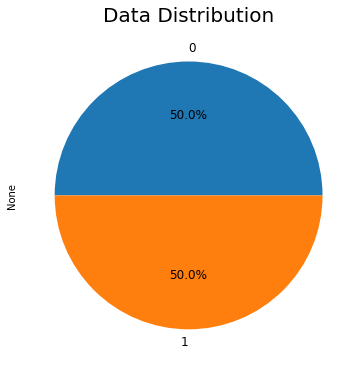

In [18]:
print("\n", '\033[1m' + 'The percentage of the recorded transactions:' + '\033[0m')
print("\n","50% are valid", "\n", "50% are fraudulent")
print("\n", "-----------------------------------------------")
df_new.groupby('Class').size().plot(kind='pie', autopct='%.1f%%',figsize=(6, 8),textprops={'size': 'large'},wedgeprops={'linewidth': 2.0})
plt.title('Data Distribution', size = 20)

In [19]:
# Checking the average of each class per column.

df_new.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94995.260042,-0.035454,-0.040938,0.112180,0.012200,0.102843,-0.032938,0.036934,-0.043097,-0.032600,...,-0.015531,0.037769,-0.009404,0.018863,-0.004775,0.007225,0.061434,-0.039803,-0.013069,83.387759
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.466550,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


### LOGISTIC REGRESSION

Logistic Regression is commonly used for binary classification problems where the outcome is either 1 or 0. It models the relationship between the dependent variable and independent variables as a logistic function, producing probabilities of the outcomes.

In [20]:
# Assigning x and y variables

x = df_new.drop(columns=['Class', "Transaction"], axis=1)
y = df_new['Transaction']

#### Splitting data into test and training set for modeling.

Splitting the data into training and test sets is a very important part of the machine learning process. It helps us make sure that the models we build are evaluated properly and chosen fairly, without any biases.

In [21]:
# Splitting data into test and train
# Stratify helps balance split data

X_training_data, X_testing_data, y_training_data, y_testing_data = train_test_split(x, y, test_size=0.2,stratify=y,random_state=42)
logreg = LogisticRegression(max_iter = 4000)
logreg.fit(X_training_data, y_training_data)


LogisticRegression(max_iter=4000)

In [22]:
# Checking data distribution form original x into x train and x test

print('\033[1m' + 'X data shape' + '\033[0m',x.shape)
print('\033[1m' + 'X train data shape' + '\033[0m',X_training_data.shape)
print('\033[1m' + 'X test data shape' + '\033[0m',X_testing_data.shape)

X data shape (946, 30)
X train data shape (756, 30)
X test data shape (190, 30)


In [23]:
# Checking accuracy scores for train and test dataset

y_pred = logreg.predict(X_testing_data)
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_training_data, y_training_data)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_testing_data, y_testing_data)))

Accuracy of logistic regression classifier on train set: 0.94
Accuracy of logistic regression classifier on test set: 0.92


In [24]:
# Checking confusion matrix results

confused = confusion_matrix(y_testing_data,y_pred)
print('\033[1m' + 'CONFUSION MATRIX:' + '\033[0m')
print("\n", confused)


CONFUSION MATRIX:

 [[82 13]
 [ 2 93]]


In [25]:
# Checking classification report results

print("\n", '\033[1m' + 'CLASSIFICATION REPORT:' + '\033[0m', "\n")
print(classification_report(y_testing_data,y_pred))


 CLASSIFICATION REPORT: 

              precision    recall  f1-score   support

       Fraud       0.98      0.86      0.92        95
       Valid       0.88      0.98      0.93        95

    accuracy                           0.92       190
   macro avg       0.93      0.92      0.92       190
weighted avg       0.93      0.92      0.92       190



In [26]:
# Checking model predictions

print("\n", '\033[1m' + 'Sample Prediction of Logistic Regression:' + '\033[0m', "\n")

features = np.array([[120331.0, 2.079955, -1.531944, -0.868426, 2.625675, -0.407193, 1.800499,0.592941, 0.708417,
                      0.432454, -0.054952, -1.593105, 0.538196,-0.991390,-1.119670, -1.119670, -0.510602,1.991691,
                      0.313502, -1.232622, -0.682920, 0.261057, 0.798278, 0.012463, -0.037501, -0.037501, 0.376777, 
                      -0.055353, 0.133558,378.66]])
print(logreg.predict(features))


 Sample Prediction of Logistic Regression: 

['Valid']


/Users/sarbjitmadra/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


**-------------------------------------------------------------------------------------------------------------------------------------------------------**

### DECISION TREE

There are alot of other approaches that we can use to train our model and one of them is: Decision Tree. It is a method for making predictions or decisions by breaking down a problem into smaller, simpler decisions based on certain conditions. The final outcome is a prediction or decision based on all the previous decisions made along the way.

In [27]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2,stratify=y,random_state=42)
dtree = DecisionTreeClassifier()
dtree.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [28]:
print('\033[1m' + 'X data shape' + '\033[0m',x.shape)
print('\033[1m' + 'X train data shape' + '\033[0m',xtrain.shape)
print('\033[1m' + 'X test data shape' + '\033[0m',xtest.shape)

X data shape (946, 30)
X train data shape (756, 30)
X test data shape (190, 30)


In [29]:
y_pred1 = dtree.predict(xtest)
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(dtree.score(xtrain, ytrain)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(dtree.score(xtest, ytest)))

Accuracy of logistic regression classifier on train set: 1.00
Accuracy of logistic regression classifier on test set: 0.89


In [30]:
confused = confusion_matrix(ytest,y_pred1)
print('\033[1m' + 'CONFUSION MATRIX:' + '\033[0m')
print("\n", confused)

CONFUSION MATRIX:

 [[80 15]
 [ 6 89]]


In [31]:
print("\n", '\033[1m' + 'CLASSIFICATION REPORT:' + '\033[0m', "\n")
print(classification_report(ytest,y_pred1))


 CLASSIFICATION REPORT: 

              precision    recall  f1-score   support

       Fraud       0.93      0.84      0.88        95
       Valid       0.86      0.94      0.89        95

    accuracy                           0.89       190
   macro avg       0.89      0.89      0.89       190
weighted avg       0.89      0.89      0.89       190



In [32]:
print("\n", '\033[1m' + 'Sample Prediction with Decision Tree:' + '\033[0m', "\n")
print(dtree.predict(features))


 Sample Prediction with Decision Tree: 

['Valid']


/Users/sarbjitmadra/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### CONCLUSION

Both logistic regression and decision tree were used for credit card fraud detection, with logistic regression having an accuracy of 92% and decision tree having 89%. The use of undersampling approach in logistic regression improved its performance compared to decision tree. The logistic approach benefits banks by improving security, efficiency and customer experience, and also benefits customers by reducing false alarms and improving the overall credit card usage experience.